In [270]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
pd.options.display.max_columns=None
plt.rcParams["figure.figsize"] = (10,5)
import time

# Load all the librarires
# for data manipulation and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score

#for model interpretation
#import shap

# deployment module
#import streamlit as st

print("All Libraries are imported")


All Libraries are imported


In [271]:
df=pd.read_csv('train_LZdllcl.csv')

In [272]:
print('The number of rows in the dataset are:',df.shape[0])
print('The number of columns in the dataset are:',df.shape[1])

The number of rows in the dataset are: 54808
The number of columns in the dataset are: 14


In [273]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [274]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [275]:
df.education=df.education.replace(to_replace=np.nan, value=df.education.mode()[0])
df.previous_year_rating=df.previous_year_rating.replace(to_replace=np.nan, 
                                                        value=df.previous_year_rating.mode()[0])

In [276]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [277]:
df.drop(columns='employee_id',axis=1,inplace=True)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [279]:
df.age.value_counts()

30    3665
32    3534
31    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
48     557
47     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: age, dtype: int64

* bin the age column into five intervals: 20-29, 30-39, 40-49, 50-59, and 60-69

In [280]:

age = df.age

bins = [19, 30, 40, 50, 61]
labels = ['20-29', '30-39', '40-49', '50-59']
age_group = pd.cut(age, bins=bins, labels=labels)

# print the updated series
print(age_group.value_counts())


30-39    26028
20-29    18118
40-49     7810
50-59     2852
Name: age, dtype: int64


In [281]:
sum(age_group.value_counts().values)

54808

In [282]:
df.age.shape

(54808,)

In [283]:
df.age=age_group

In [284]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,30-39,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,20-29,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,30-39,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,30-39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,40-49,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,40-49,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,30-39,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,20-29,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,20-29,1.0,2,0,0,45,0


### Mean encoding is a technique used to encode categorical variables with numerical values based on the mean of the target variable for each category

In [285]:
df.age.unique()

['30-39', '20-29', '40-49', '50-59']
Categories (4, object): ['20-29' < '30-39' < '40-49' < '50-59']

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            54808 non-null  object  
 1   region                54808 non-null  object  
 2   education             54808 non-null  object  
 3   gender                54808 non-null  object  
 4   recruitment_channel   54808 non-null  object  
 5   no_of_trainings       54808 non-null  int64   
 6   age                   54808 non-null  category
 7   previous_year_rating  54808 non-null  float64 
 8   length_of_service     54808 non-null  int64   
 9   KPIs_met >80%         54808 non-null  int64   
 10  awards_won?           54808 non-null  int64   
 11  avg_training_score    54808 non-null  int64   
 12  is_promoted           54808 non-null  int64   
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 5.1+ MB


In [287]:
df.select_dtypes(exclude=np.number)

,department,region,education,gender,recruitment_channel,age
0,Sales & Marketing,region_7,Master's & above,f,sourcing,30-39
1,Operations,region_22,Bachelor's,m,other,20-29
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,30-39
3,Sales & Marketing,region_23,Bachelor's,m,other,30-39
4,Technology,region_26,Bachelor's,m,other,40-49
...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,40-49
54804,Operations,region_27,Master's & above,f,other,30-39
54805,Analytics,region_1,Bachelor's,m,other,20-29
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,20-29


In [288]:
df[['KPIs_met >80%','awards_won?','is_promoted']]=df[['KPIs_met >80%','awards_won?','is_promoted']].astype('object')
df['no_of_trainings']=df['no_of_trainings'].astype('object')

In [289]:
num=df.select_dtypes(include=np.number).columns


In [290]:
cat=df.select_dtypes(exclude=np.number).columns


In [291]:
for i in cat:
    print(i,'\n',df[i].unique())

department 
 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 
 ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 
 ["Master's & above" "Bachelor's" 'Below Secondary']
gender 
 ['f' 'm']
recruitment_channel 
 ['sourcing' 'other' 'referred']
no_of_trainings 
 [1 2 3 4 7 5 6 8 10 9]
age 
 ['30-39', '20-29', '40-49', '50-59']
Categories (4, object): ['20-29' < '30-39' < '40-49' < '50-59']
KPIs_met >80% 
 [1 0]
awards_won? 
 [0 1]
is_promoted 
 [0 1]


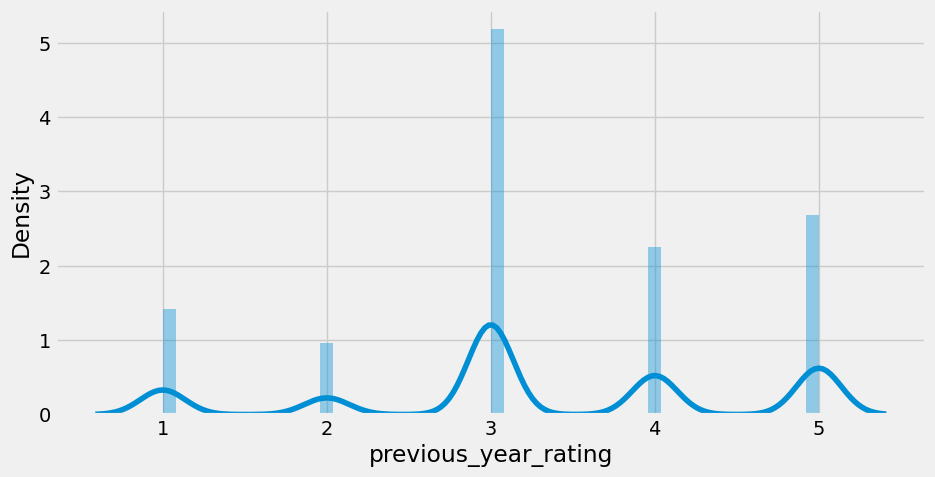

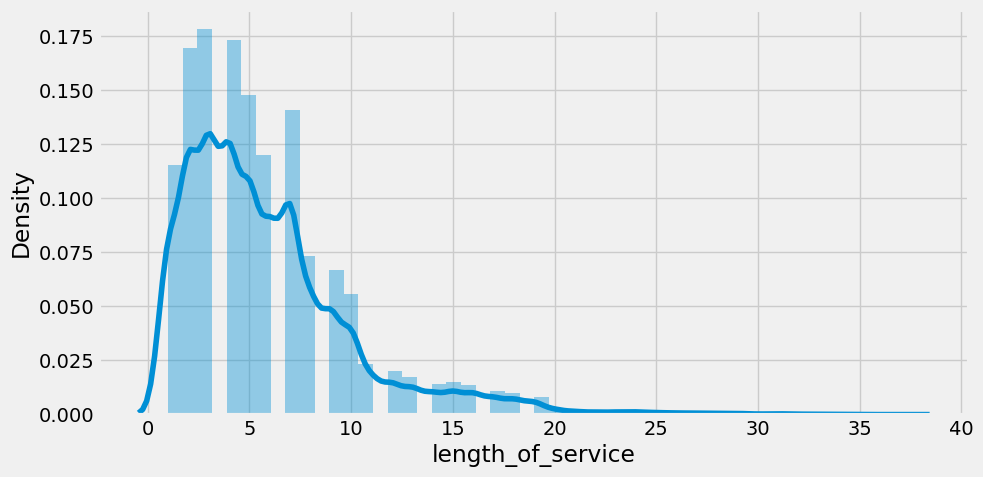

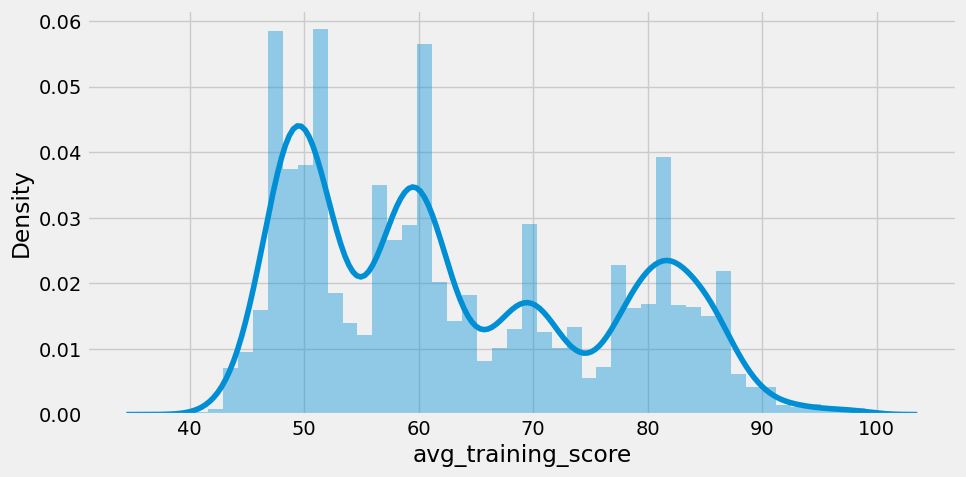

In [292]:
for i in df[num].columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.show()

In [293]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0


In [294]:
df[cat].describe().T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,54808,3,Bachelor's,39078
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446
no_of_trainings,54808,10,1,44378
age,54808,4,30-39,26028
KPIs_met >80%,54808,2,0,35517
awards_won?,54808,2,0,53538
is_promoted,54808,2,0,50140


In [295]:
df[cat]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,KPIs_met >80%,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,30-39,1,0,0
1,Operations,region_22,Bachelor's,m,other,1,20-29,0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,30-39,0,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,30-39,0,0,0
4,Technology,region_26,Bachelor's,m,other,1,40-49,0,0,0
...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,40-49,0,0,0
54804,Operations,region_27,Master's & above,f,other,1,30-39,0,0,0
54805,Analytics,region_1,Bachelor's,m,other,1,20-29,1,0,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,20-29,0,0,0


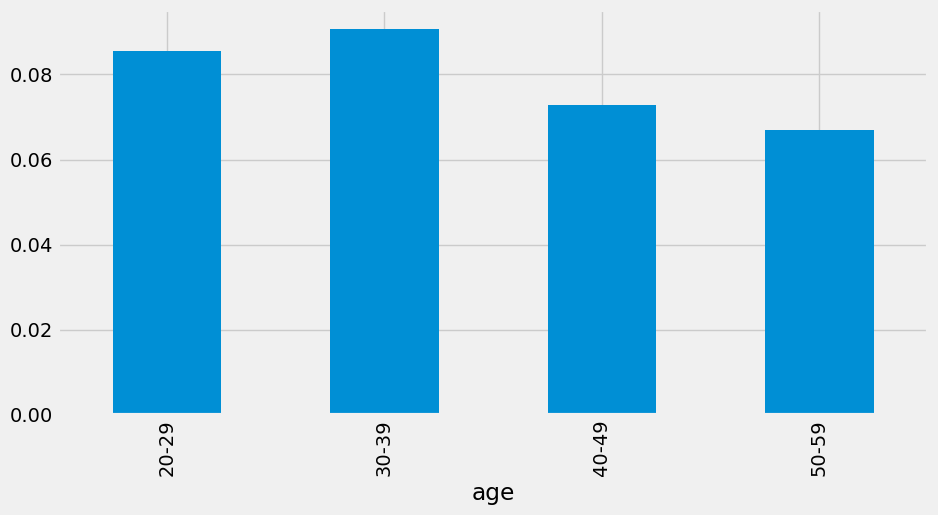

In [296]:
df.groupby(by='age')['is_promoted'].mean().plot(kind='bar')
plt.show()

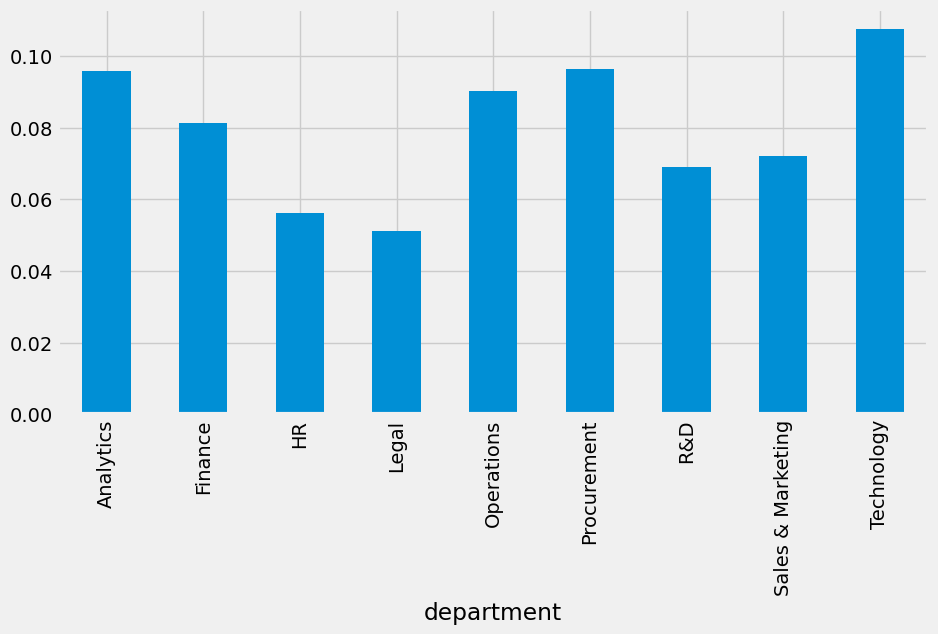

In [297]:
df.groupby(by='department')['is_promoted'].mean().plot(kind='bar')
plt.show()

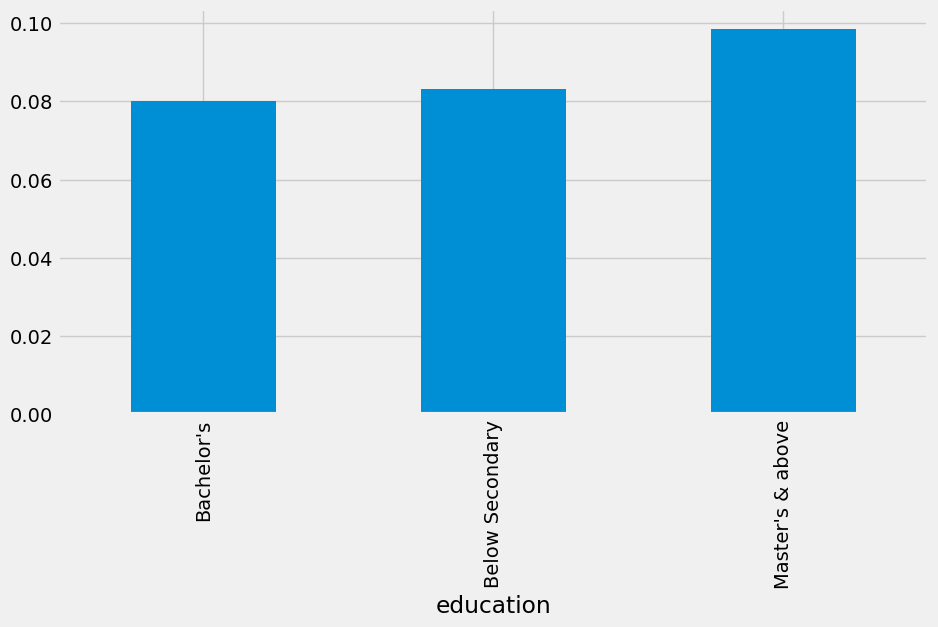

In [298]:
df.groupby(by='education')['is_promoted'].mean().plot(kind='bar')
plt.show()

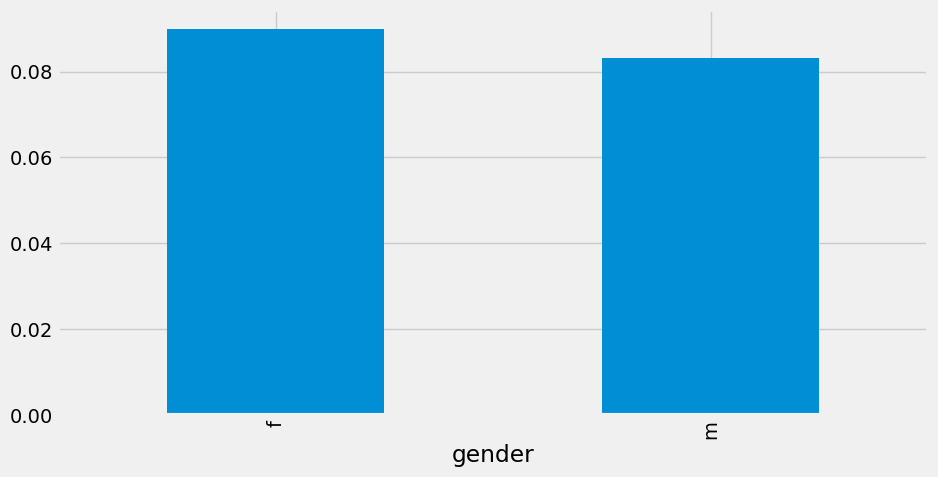

In [299]:
df.groupby(by='gender')['is_promoted'].mean().plot(kind='bar')
plt.show()

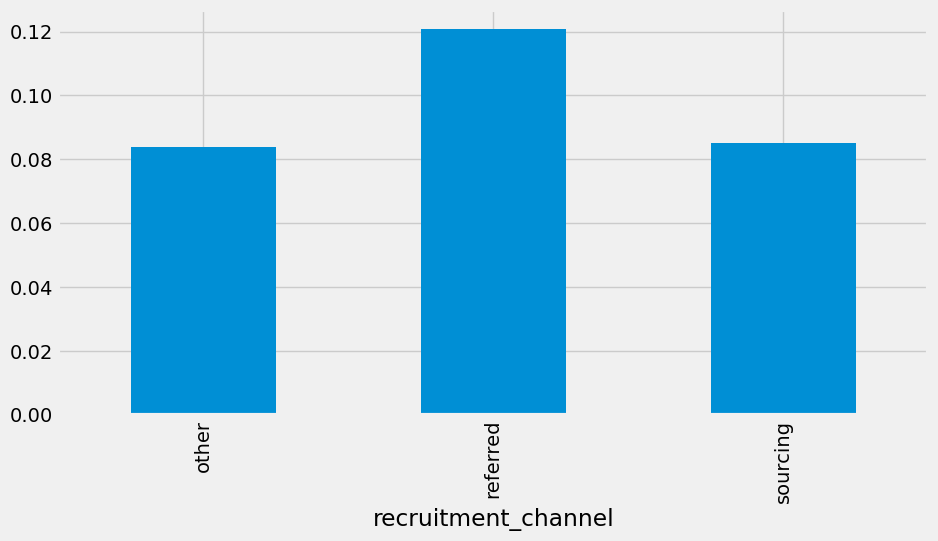

In [300]:

df.groupby(by='recruitment_channel')['is_promoted'].mean().plot(kind='bar')
plt.show()

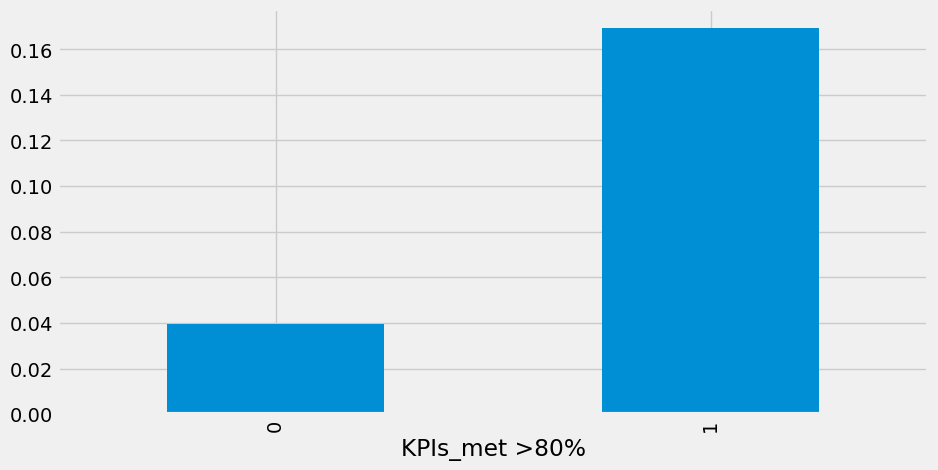

In [301]:

df.groupby(by='KPIs_met >80%')['is_promoted'].mean().plot(kind='bar')
plt.show()

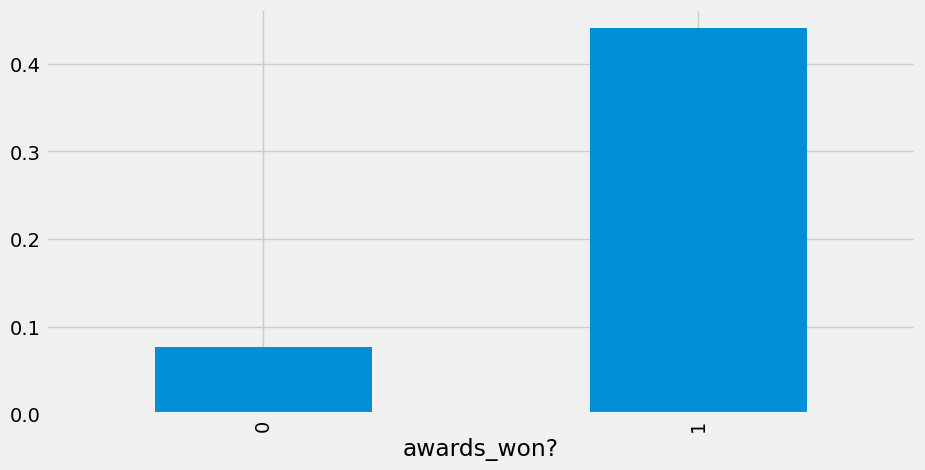

In [302]:

df.groupby(by='awards_won?')['is_promoted'].mean().plot(kind='bar')
plt.show()

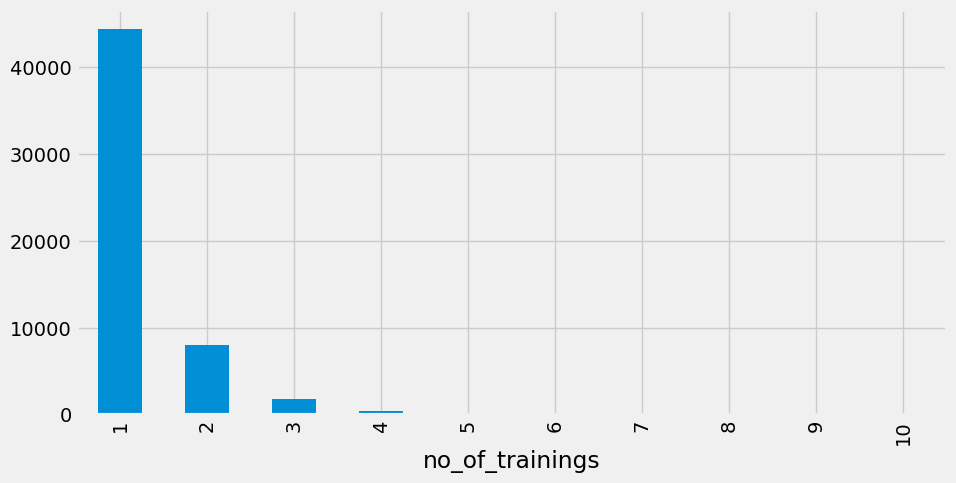

In [303]:
df.groupby(by='no_of_trainings')['is_promoted'].count().plot(kind='bar')
plt.show()

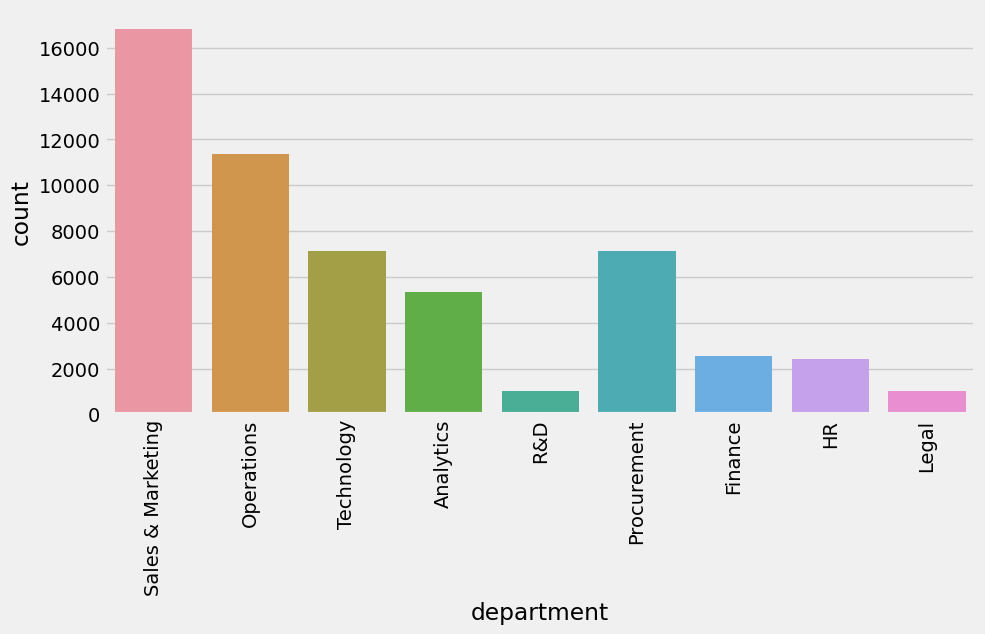

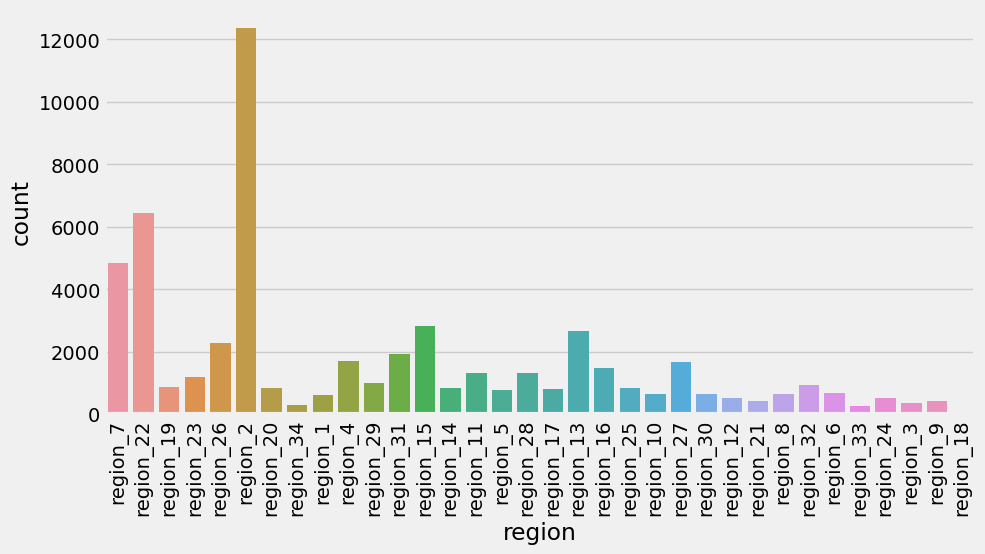

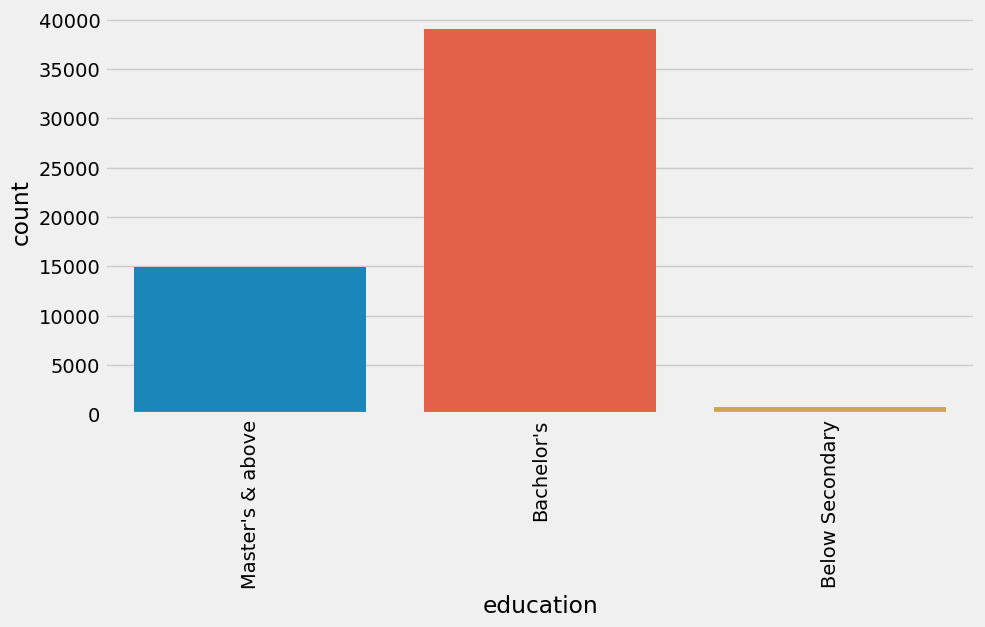

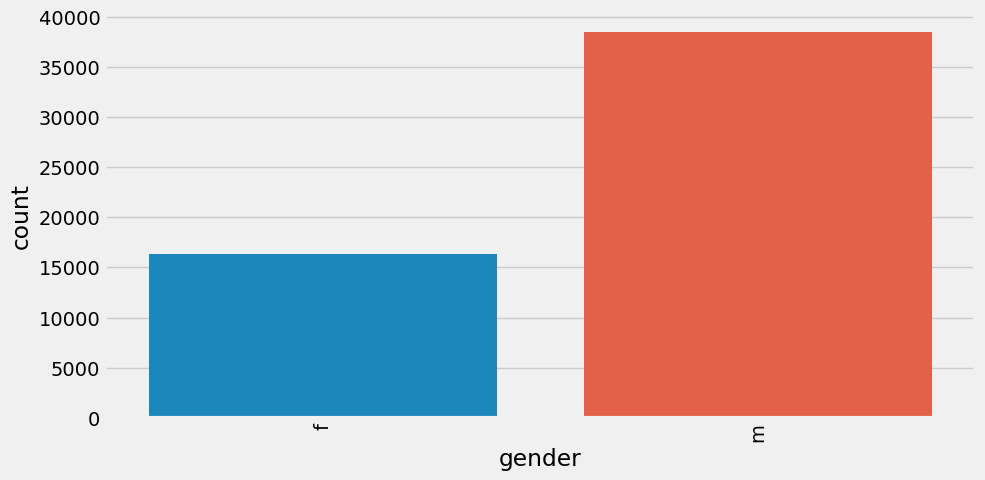

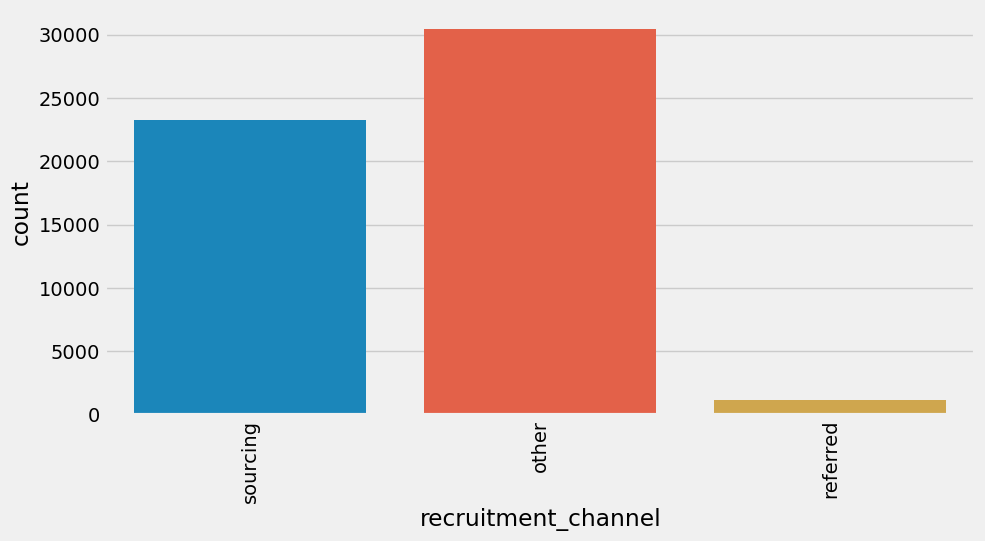

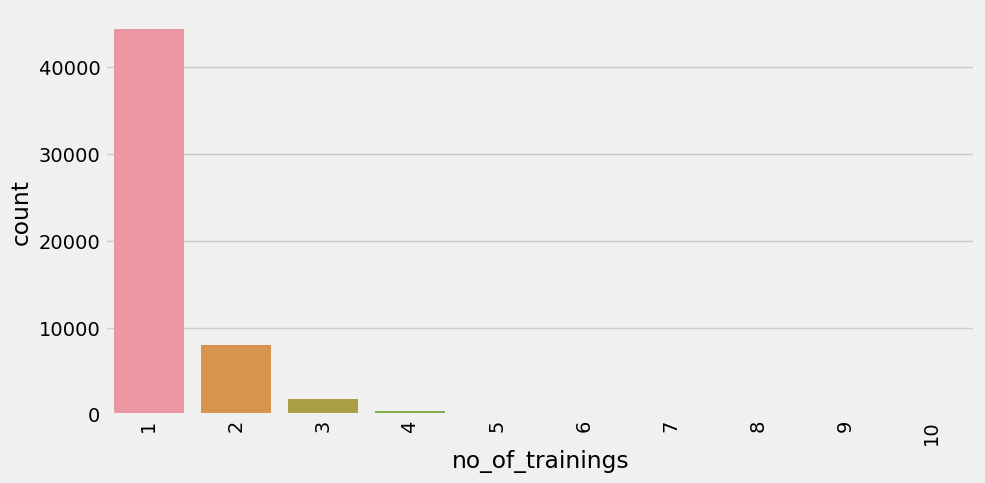

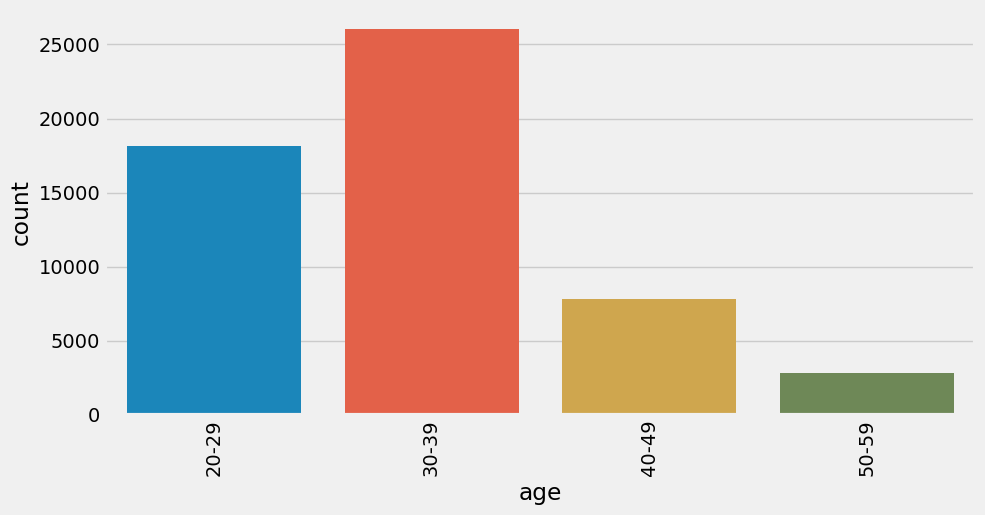

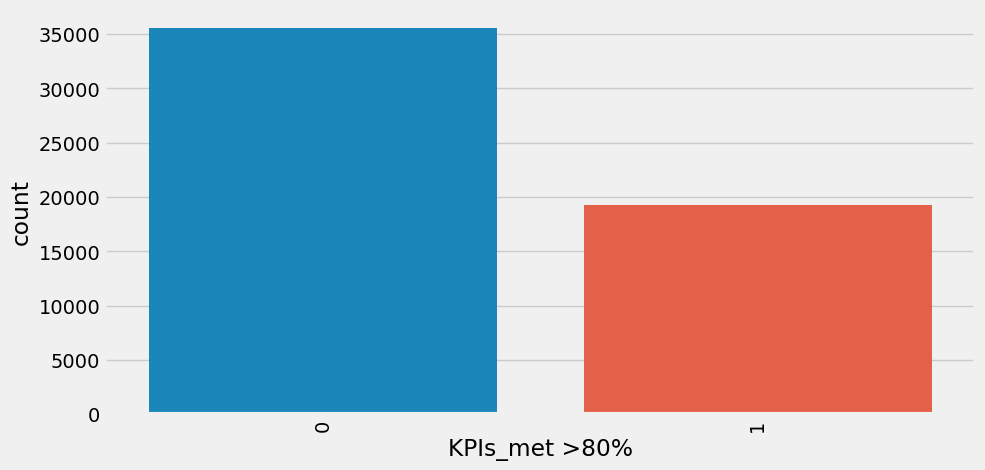

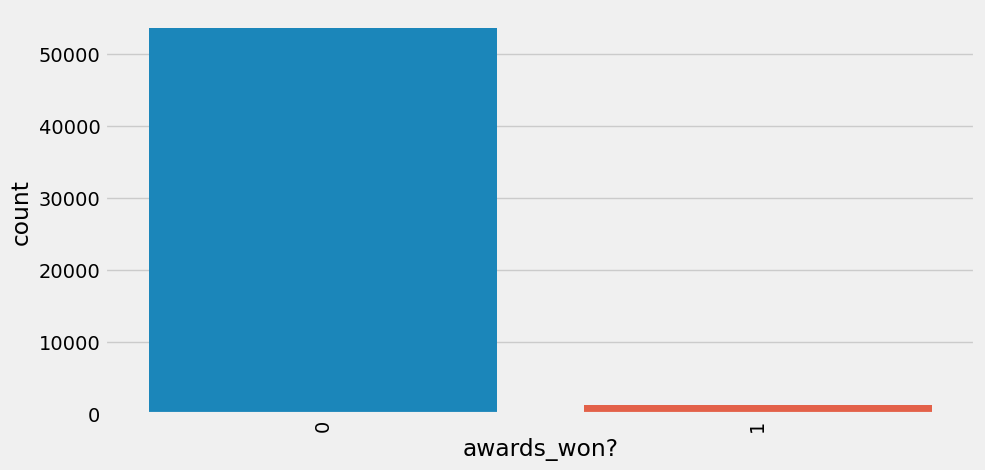

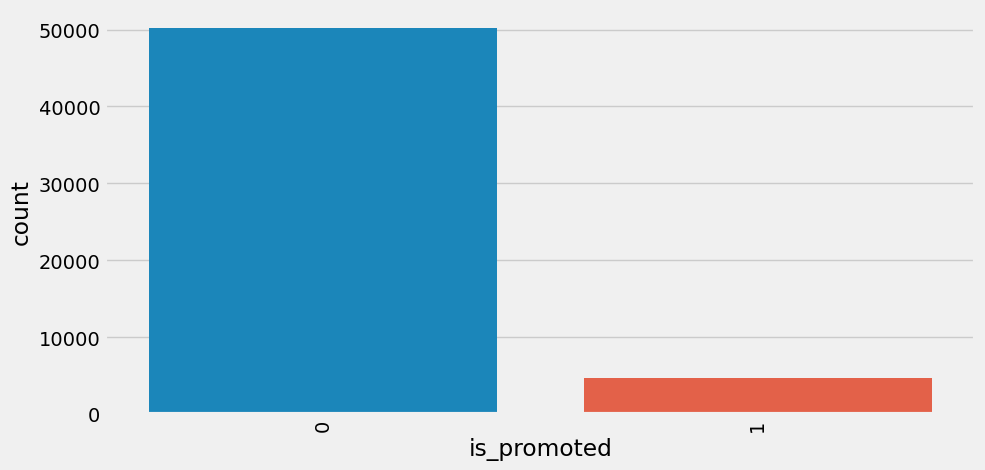

In [304]:
for i in cat:
    sns.countplot(x=df[i])
    plt.xticks(rotation = 90)
    plt.show()

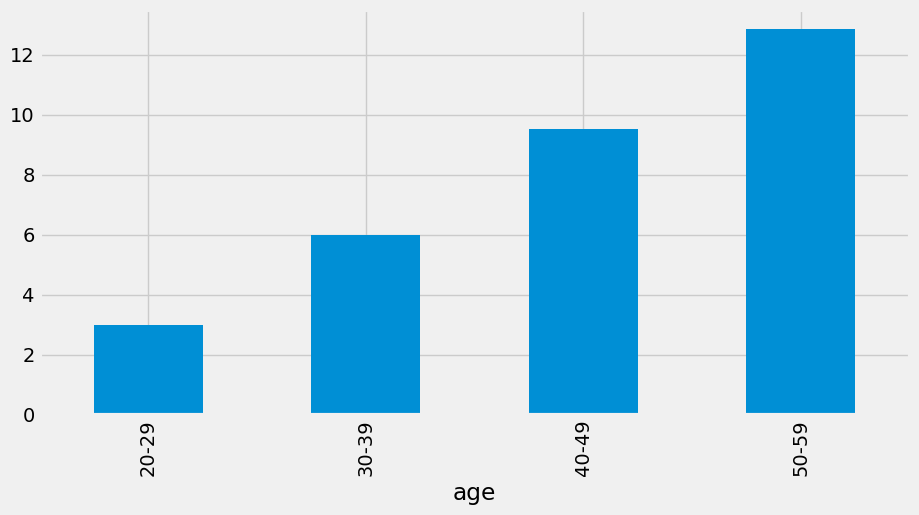

In [305]:
df.groupby(by='age')['length_of_service'].mean().plot(kind='bar')
plt.show()

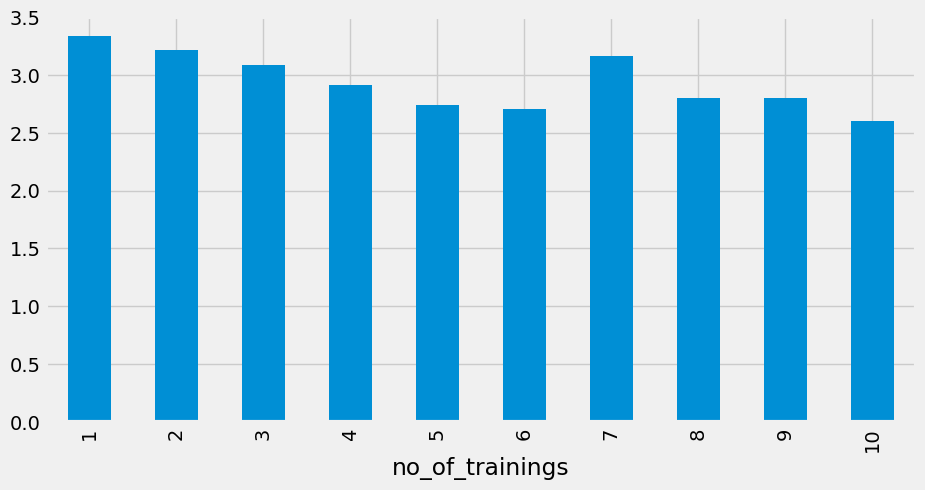

In [306]:
df.groupby(by='no_of_trainings')['previous_year_rating'].mean().plot(kind='bar')
plt.show()

In [307]:
df.no_of_trainings.unique()

array([1, 2, 3, 4, 7, 5, 6, 8, 10, 9], dtype=object)

In [308]:
df['tot_training_score']=df['no_of_trainings']*df['avg_training_score']


In [309]:
df['tot_training_score']=df['tot_training_score'].astype('int64')

In [310]:
df.drop(columns=['no_of_trainings','avg_training_score'],axis=1,inplace=True)

In [311]:
num=df.select_dtypes(include=np.number).columns
cat=df.select_dtypes(exclude=np.number).columns

In [312]:
df.head()

,department,region,education,gender,recruitment_channel,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,is_promoted,tot_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,30-39,5.0,8,1,0,0,49
1,Operations,region_22,Bachelor's,m,other,20-29,5.0,4,0,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,30-39,3.0,7,0,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,30-39,1.0,10,0,0,0,100
4,Technology,region_26,Bachelor's,m,other,40-49,3.0,2,0,0,0,73


In [313]:
cat

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'age', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

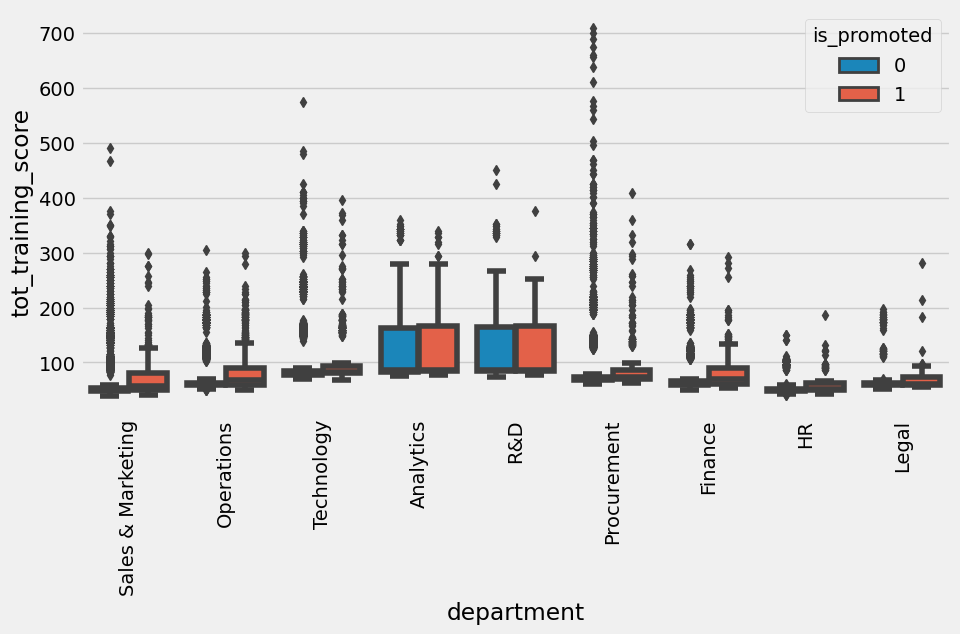

In [314]:
sns.boxplot(data=df,y=df['tot_training_score'],x=df['department'],hue=df['is_promoted'])
plt.xticks(rotation=90)
plt.show()

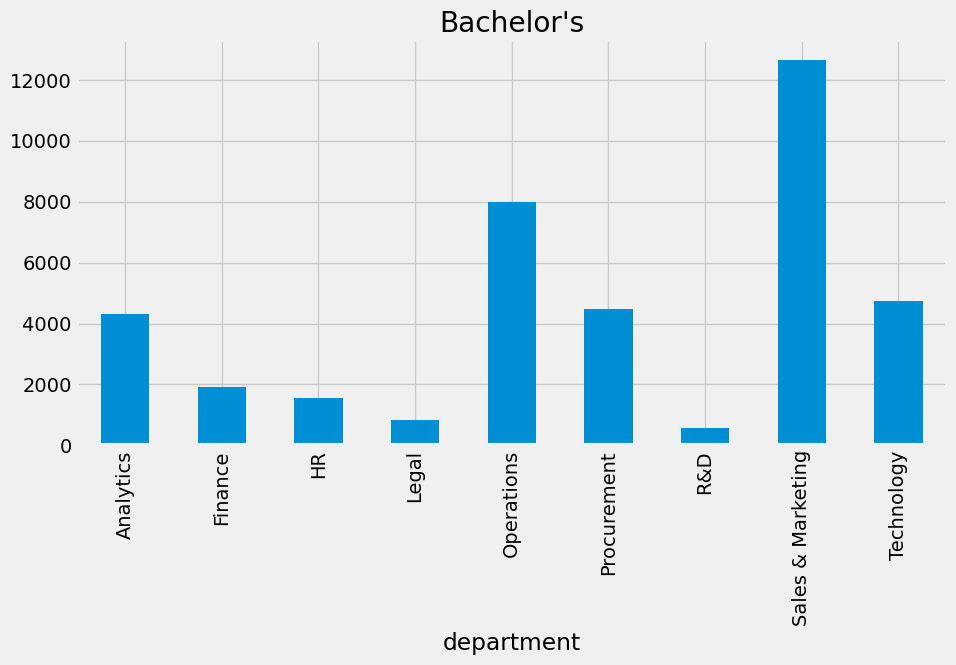

In [315]:
df[df['education']=='Bachelor\'s'].groupby(by=df['department'])['department'].count().plot(kind='bar')
plt.title('Bachelor\'s')
plt.show()

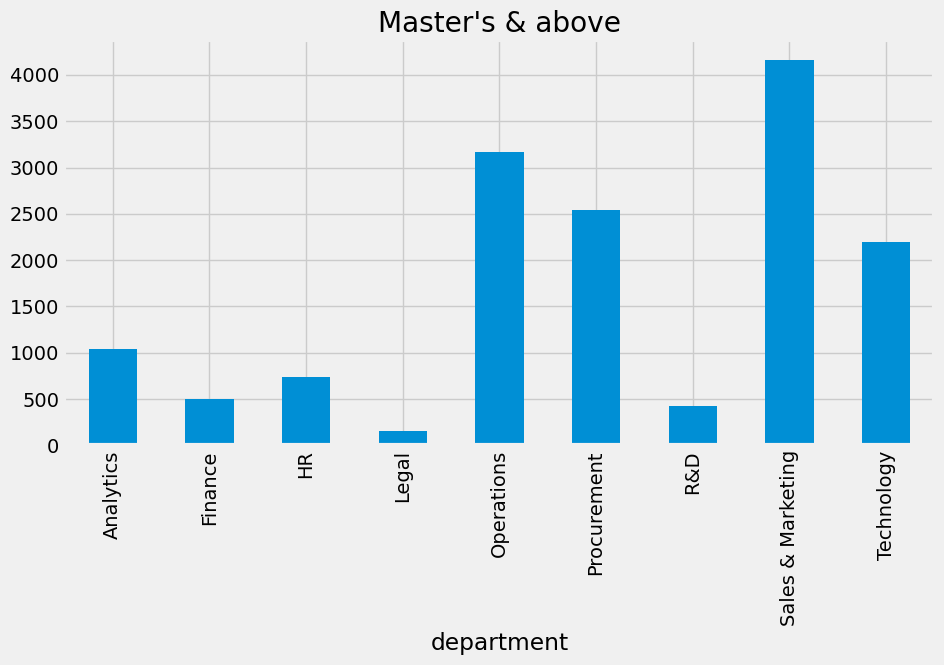

In [316]:
df[df['education']=='Master\'s & above'].groupby(by=df['department'])['department'].count().plot(kind='bar')
plt.title('Master\'s & above')
plt.show()

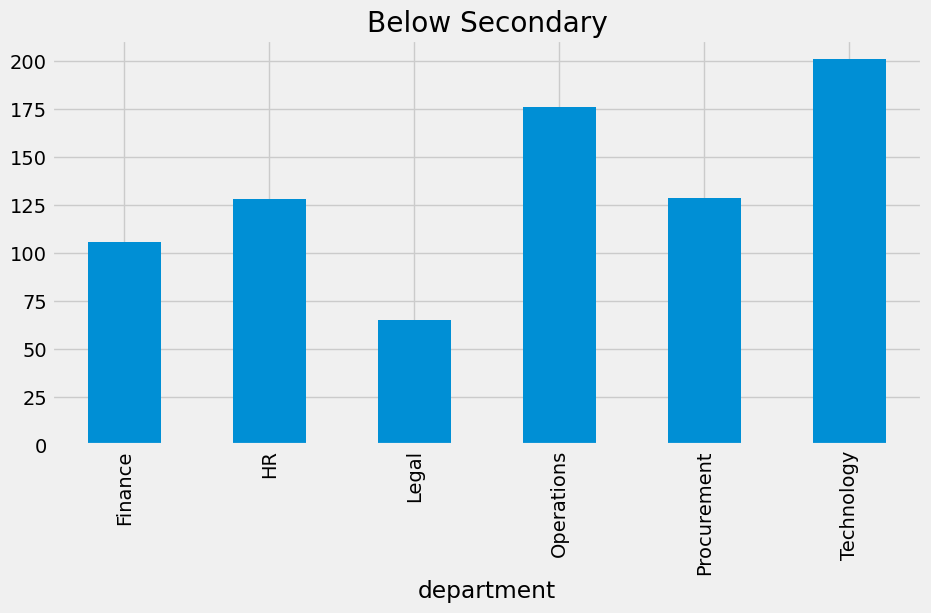

In [317]:
df[df['education']=='Below Secondary'].groupby(by=df['department'])['department'].count().plot(kind='bar')
plt.title('Below Secondary')
plt.show()

In [318]:
df.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [319]:
sns.boxplot(data=df,y=df['tot_training_score'],x=df['department'],hue=df[''])
plt.xticks(rotation=90)
plt.show()

KeyError: ''

In [ ]:
s=df.groupby(by='department')['tot_training_score'].mean()
plt.pie(s.values, labels = s.index,autopct='%.2f%%')
plt.show()

In [ ]:
df[num].skew()

In [ ]:
df.education.unique()

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='is_promoted', hue='education', data=df)
plt.legend(loc='best')
plt.show()
pd.crosstab(df.education, 
            df.is_promoted, 
            normalize='index').reindex(index=['Below Secondary', 'Below Secondary', 'Below Secondary'])

In [ ]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer()
df[['length_of_service','tot_training_score']]=p.fit_transform(df[['length_of_service','tot_training_score']])

In [ ]:
df[num].skew()

In [ ]:
for i in num:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
cat

In [ ]:
for i in num:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
num

In [ ]:
cat

In [ ]:
sns.heatmap(df.corr(),annot=True)

# STATISTICAL TESTS

#### Statistical Test to Determine a significant Relationship between independent variable and target:
* A Chisquare contingency test of independence is to be done with categorical columns the target, as our target is a categorical column.
* A 2 sample unpaired t test of independence is to be done with numerical columns against the target, as our target is a categorical column.
* Null Hypothesis : There is NO statistically significant relationship.
* Alternate Hypothesis : There is a statistically significant relationship.

In [ ]:
from scipy import stats
for i in cat:
    if i not in ['is_promoted']:
        ct = pd.crosstab(df['is_promoted'], df[i])
        print('p_value for',i,':',round(stats.chi2_contingency(observed = ct)[1],2))       
for i in num:
    a = df[df['is_promoted'] == 0][i]
    b = df[df['is_promoted'] == 1][i]
    print('p_value for',i,':',round(stats.ttest_ind(a,b)[1],2))        

In [ ]:
for i in num:
    a = df[df['is_promoted'] == 0][i]
    b = df[df['is_promoted'] == 1][i]
    print('p_value for',i,':',round(stats.ttest_ind(a,b)[1],2))

* All columns with p_value < 0.05 are significant, except the column length_of_service. Its not significant

In [ ]:
df=pd.get_dummies(data=df,columns=['age','department','region',
                                   'gender','recruitment_channel'],drop_first=True)

In [ ]:
df

In [ ]:
df.isna().sum()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Below Secondary', "Bachelor's", "Master's & above"]],dtype='int64')
df.education = encoder.fit_transform([[label] for label in df.education])

In [ ]:
df

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.is_promoted=df.is_promoted.astype('int64')

# SAMPLING

In [ ]:
df.is_promoted.value_counts()

In [ ]:
df.is_promoted.value_counts().plot(kind='bar')
plt.title('TARGET DISTRIBUTION')
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.show()

In [ ]:
d0=df[df.is_promoted==0]
d1=df[df.is_promoted!=0]
df_0=d0.sample(n=5000, random_state=42)
df_sample_under=pd.concat([df_0,d1],axis=0)

In [ ]:
df_sample_under.is_promoted.value_counts()

In [ ]:
x=df_sample_under.drop(columns='is_promoted')
y=df_sample_under['is_promoted']

In [ ]:
plt.figure(figsize=[8,5])
df.is_promoted.value_counts().plot(kind='bar')
plt.title('TARGET DISTRIBUTION')
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.show()

# Dataset and preprocessing
Before fitting the models,The following excercises are performed.Data wrangling, preprocessing, exploration and visualization. The dataset used in this project is the human resource analytics data from a live hackathon on Analytics vidhya:https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/. It comprises 54,808 observations and 14 variables. There were missing values which were treated. The target variable is 'is_promoted, with 1 indicating Promoted and 0 non-promoted. Irrelevant variables(employee Id) was dropped, features were standardised to the same scale ,categorical variables are converted using the Ordinal Encoding and dummy encoding and also,examined the correlation between the features. there is no high correlation between them. 

# TRAIN TEST SPLIT

In [ ]:
x=df_sample_under.drop(columns='is_promoted')
y=df_sample_under['is_promoted']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

In [ ]:
xtrain.describe()

In [ ]:
xtrain_sc=xtrain.copy()
xtest_sc=xtest.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain_sc[['previous_year_rating', 
           'length_of_service', 
           'tot_training_score']]=s.fit_transform(xtrain[['previous_year_rating', 
                                                          'length_of_service', 
                                                          'tot_training_score']])
xtest_sc[['previous_year_rating', 
          'length_of_service', 
          'tot_training_score']]=s.transform(xtest[['previous_year_rating', 
                                                    'length_of_service', 
                                                    'tot_training_score']])


In [ ]:
xtrain_sc.describe()

In [ ]:
xtest_sc.describe()

In [ ]:
xtrain=xtrain_sc

In [ ]:
xtest=xtest_sc

In [ ]:
xtrain.describe()

# BASE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain,ytrain)
ypred=LGB_model.predict(xtest)
print('confusion_matrix:\n',confusion_matrix(ytest,ypred))
print('\nclassification_report:\n',classification_report(ytest,ypred))
print('Train score: ',LGB_model.score(xtrain,ytrain))
print('Test score: ',LGB_model.score(xtest,ytest))

# FEATURE ELIMINATION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
x=df_sample_under.drop(columns='is_promoted')
y=df_sample_under.is_promoted
lr=LinearRegression()
rfe=RFE(estimator=lr)
rfe_model=rfe.fit(x,y)
rfe_model.ranking_

In [ ]:
ranking=pd.DataFrame(rfe_model.ranking_,columns=['Rank'],index=x.columns)

In [ ]:
ranking[ranking['Rank']==1]

In [ ]:
ranking[ranking['Rank']==1].index

In [ ]:
x=df_sample_under[list(ranking[ranking['Rank']==1].index)]
y=df_sample_under.is_promoted
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=13)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=13)

In [ ]:
xtrain[['KPIs_met >80%','awards_won?']]=xtrain[['KPIs_met >80%','awards_won?']].astype('int64')

In [ ]:
xtest[['KPIs_met >80%','awards_won?']]=xtest[['KPIs_met >80%','awards_won?']].astype('int64')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain,ytrain)
ypred=LGB_model.predict(xtest)
print('confusion_matrix\n',confusion_matrix(ytest,ypred))
print('classification_report\n',classification_report(ytest,ypred))
print('Train score: ',LGB_model.score(xtrain,ytrain))
print('Test score: ',LGB_model.score(xtest,ytest))

In [ ]:
xtrain.info()

In [ ]:
xtest.info()

In [ ]:
# function to print metrics
def print_metrics(ytest,ypred,model):
    print('Metrics for the model',model)
    print(' ')
    print("Accuracy score is ",accuracy_score(ytest,ypred))
    print(' ')
    print("recall score is ",recall_score(ytest,ypred))
    print(' ')
    print('precision score is',precision_score(ytest,ypred))
    print(' ')
    print('f1 score is', f1_score(ytest,ypred))
    print(' ')
    print(' Roc score is ',roc_auc_score(ytest,ypred))
    print(' ')
    print('Confusion matrix \n', confusion_matrix(ytest,ypred))
    print(' ')
    print('Classification report \n',classification_report(ytest,ypred))

In [ ]:
#lets select the best model based on f1 score and optimize it
import time
clfs={
    'KNN': KNeighborsClassifier(),
    'NaiveBayes':GaussianNB(),
    'Logregs':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier()
}
models_report=pd.DataFrame(columns=['Model','accuracy','F1_score','Train score','Test score','Time_taken'])

for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    start_time = time.time()
    clf.fit(xtrain,ytrain)
    end_time = time.time()
    ypred=clf.predict(xtest)
    print('Fitting the model.....', clf_name)
    t={
        'Model':clf_name,
        'accuracy':accuracy_score(ytest,ypred),
        'F1_score':f1_score(ytest,ypred),
        'Train score':clf.score(xtrain,ytrain),
        'Test score':clf.score(xtest,ytest),
        'Precision score':precision_score(ytest,ypred),
        'Recall score':recall_score(ytest,ypred),
        'Time_taken':end_time - start_time
    }
    
    models_report=models_report.append(t,ignore_index=True)
models_report











### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier(random_state=100)
GB_model.fit(xtrain,ytrain)
ypred=GB_model.predict(xtest)
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain,ytrain))
print('Test score',GB_model.score(xtest,ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

### XGBClassifier

In [ ]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier(random_state=100)
XGB_model.fit(xtrain,ytrain)
ypred=XGB_model.predict(xtest)
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',XGB_model.score(xtrain,ytrain))
print('Test score',XGB_model.score(xtest,ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

In [ ]:
info=pd.DataFrame(GB_model.feature_importances_,columns=['Information_Gain'],index=xtrain.columns)
info

In [ ]:
sorted_info_gain = info['Information_Gain'].sort_values(ascending=False)
columns = sorted_info_gain.index
plt.bar(columns, sorted_info_gain)
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Information Gain')
plt.title('Sorted Information Gain')
plt.show()

In [ ]:
info=pd.DataFrame(GB_model.feature_importances_,columns=['Information_Gain'],index=xtrain.columns)
info

In [ ]:
list(info[info['Information_Gain']>0.005].index)

### GradientBoostingClassifier

In [ ]:
GB_model=GradientBoostingClassifier()
GB_model.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=GB_model.predict(xtest[list(info[info['Information_Gain']>0.005].index)])
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain))
print('Test score',GB_model.score(xtest[list(info[info['Information_Gain']>0.005].index)],ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

### XGBClassifier

In [158]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier(random_state=100)
XGB_model.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=XGB_model.predict(xtest[list(info[info['Information_Gain']>0.005].index)])
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',XGB_model.score(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain))
print('Test score',XGB_model.score(xtest[list(info[info['Information_Gain']>0.005].index)],ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.7762840399862116
f1_score: 0.7821416582745887
Train score 0.8139500517215901
Test score 0.7762840399862116
Precision score 0.7392131979695431
Recall score 0.8303635067712045


### The GradientBoosting model, with the highest accuracy and F1_score on the test set. It also has the highest recall score, indicating that it correctly identifies positive examples. However, it has a lower precision score than some of the other models, indicating that it may also predict some negative examples as positive. Overall, it appears to be the most well-rounded model with the best performance on this particular dataset.

### Both XGBoost and GradientBoosting have the same accuracy score of 0.775250. However, GradientBoosting has a slightly higher F1_score (0.784534) compared to XGBoost (0.780027). On the other hand, XGBoost has a higher train score (0.833013) compared to GradientBoosting (0.789124). In terms of precision and recall scores, XGBoost has a higher precision score (0.740551) while GradientBoosting has a higher recall score (0.846044). 

### Therefore, it is difficult to determine which model is better based on these metrics alone. It is recommended to perform further analysis such as feature importance, cross-validation, or fine-tuning of the hyperparameters to select the best model for the specific problem.


# HYPER PARAMETER TUNING - GB

In [105]:
params = {'learning_rate':[0.5,0.6,0.7],
          'n_estimators':[100,150,160],
          'min_samples_split':[2,3,5],
          'max_depth':[3,5,7]}

In [106]:
grid = GridSearchCV(estimator = GB_model, param_grid=params,cv=5,scoring='f1')
grid.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
grid.best_params_

{'learning_rate': 0.5,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [320]:
GB_model=GradientBoostingClassifier(learning_rate= 0.5,max_depth= 3,min_samples_split= 2,n_estimators= 100)
GB_model.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=GB_model.predict(xtrain[list(info[info['Information_Gain']>0.005].index)])
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain))
print('Test score',GB_model.score(xtest[list(info[info['Information_Gain']>0.005].index)],ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

ValueError: Found input variables with inconsistent numbers of samples: [2901, 6767]

In [107]:
GB_model=GradientBoostingClassifier(learning_rate= 0.5,max_depth= 3,min_samples_split= 2,n_estimators= 100)
GB_model.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=GB_model.predict(xtest[list(info[info['Information_Gain']>0.005].index)])
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain))
print('Test score',GB_model.score(xtest[list(info[info['Information_Gain']>0.005].index)],ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.7783522923129955
f1_score: 0.789249426417568
Train score 0.8058223732821044
Test score 0.7783522923129955
Precision score 0.7305825242718447
Recall score 0.8581610833927299


# HYPER PARAMETER TUNING -XGB

In [108]:
params = {'learning_rate':[0.5,0.6,0.7],
          'n_estimators':[100,150,160],
         'min_samples_split':[2,3,5],
         'max_depth':[3,5,7]}

In [109]:

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    
}

# Create an XGBClassifier instance
xgb_model = XGBClassifier(random_state=42)

# Define the GridSearchCV object
grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search.fit(xtrain[list(info[info['Information_Gain']>0.005].index)], ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [110]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}

In [111]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier(learning_rate= 0.1,max_depth= 3, n_estimators= 1000,random_state=100)
XGB_model.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=XGB_model.predict(xtest[list(info[info['Information_Gain']>0.005].index)])
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',XGB_model.score(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain))
print('Test score',XGB_model.score(xtest[list(info[info['Information_Gain']>0.005].index)],ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.7797311271975181
f1_score: 0.7901477832512315
Train score 0.8055268213388503
Test score 0.7797311271975181
Precision score 0.7326431181485993
Recall score 0.857448325017819


### Based on the provided evaluation metrics, both XGBoost and GradientBoost classifiers have similar performance with only slight differences in some metrics. It is difficult to conclude which one is better without further analysis or considering the specific problem at hand. It is recommended to try both models with different evaluation metrics and compare their performance to make a more informed decision. Additionally, tuning the hyperparameters of both models using techniques like grid search can further improve their performance.

# TEST DATA

In [112]:
df_test=pd.read_csv('test_2umaH9m.csv')

In [113]:
print('The number of rows in the dataset are:',df_test.shape[0])
print('The number of columns in the dataset are:',df_test.shape[1])

The number of rows in the dataset are: 23490
The number of columns in the dataset are: 13


In [114]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [115]:
df_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [116]:
df_test.education=df_test.education.replace(to_replace=np.nan, value=df_test.education.mode()[0])
df_test.previous_year_rating=df_test.previous_year_rating.replace(to_replace=np.nan, value=df_test.previous_year_rating.mode()[0])

In [117]:
df_test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [118]:
df2=df_test.drop(columns=['employee_id'],axis=1)

In [119]:

age = df2.age

bins = [19, 30, 40, 50, 61]
labels = ['20-29', '30-39', '40-49', '50-59']
age_group = pd.cut(age, bins=bins, labels=labels)

# print the updated series
print(age_group.value_counts())

30-39    11093
20-29     7828
40-49     3321
50-59     1248
Name: age, dtype: int64


In [120]:
df2.age=age_group

In [121]:
df2[['KPIs_met >80%','awards_won?']]=df2[['KPIs_met >80%','awards_won?']].astype('object')
df2['no_of_trainings']=df2['no_of_trainings'].astype('object')

In [122]:
num=df2.select_dtypes(include=np.number).columns
cat=df2.select_dtypes(exclude=np.number).columns

In [123]:
df2['tot_training_score']=df2['no_of_trainings']*df2['avg_training_score']

df2['tot_training_score']=df2['tot_training_score'].astype('int64')
df2.drop(columns=['no_of_trainings','avg_training_score'],axis=1,inplace=True)

In [124]:
num=df2.select_dtypes(include=np.number).columns
cat=df2.select_dtypes(exclude=np.number).columns

In [125]:
df2[num].skew()

previous_year_rating   -0.272367
length_of_service       1.703001
tot_training_score      3.019686
dtype: float64

In [126]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer()
df2[['tot_training_score','length_of_service']]=p.fit_transform(df2[['tot_training_score','length_of_service']])

In [127]:
df2[num].skew()

previous_year_rating   -0.272367
length_of_service       0.002984
tot_training_score      0.202963
dtype: float64

In [128]:
df2=pd.get_dummies(data=df2,columns=['age','department','region','gender','recruitment_channel'],drop_first=True)

In [129]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Below Secondary', "Bachelor's", "Master's & above"]],dtype='int64')

df2.education = encoder.fit_transform([[label] for label in df2.education])

df2.education

0        1
1        1
2        1
3        1
4        1
        ..
23485    0
23486    1
23487    1
23488    1
23489    2
Name: education, Length: 23490, dtype: int64

In [130]:
GB_model1=GradientBoostingClassifier(learning_rate= 0.5,max_depth= 3,min_samples_split= 2,n_estimators= 100)
GB_model1.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=GB_model1.predict(df2[list(info[info['Information_Gain']>0.005].index)])

In [131]:
df_output=pd.DataFrame()

In [132]:
df_output['employee_id']=df_test['employee_id']

In [133]:
df_output['is_promoted']=pd.Series(ypred)

In [134]:
df_output.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


# SUBMISSION FILE

In [135]:
df_output.to_csv('Output.csv', index=False)